   NUTS_Code  Air_Pollution_Average[ug/m3]
0         PT                          94.3
1        PT1                          94.3
2       PT11                          91.9
3      PT111                          86.4
4      PT112                          88.4
5      PT119                          91.1
6      PT11A                          91.3
7      PT11B                          92.2
8      PT11C                          95.3
9      PT11D                          95.7
10     PT11E                          93.3
11      PT15                          90.8
12     PT150                          90.8
13      PT16                          98.9
14     PT16B                          90.0
15     PT16D                          95.9
16     PT16E                         100.5
17     PT16F                          98.0
18     PT16G                         100.7
19     PT16H                         102.4
20     PT16I                          99.4
21     PT16J                         101.8
22      PT1

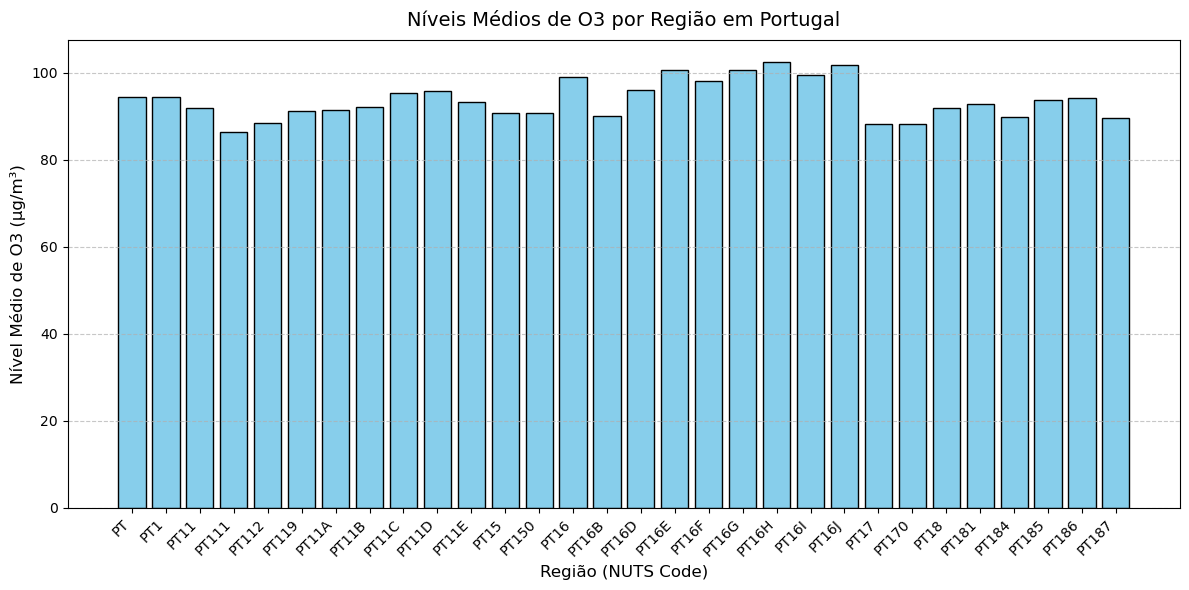


Região com o nível médio de O3 mais elevado:
NUTS Code: PT16H
Nível médio de O3: 102.40 µg/m³


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Lendo o arquivo CSV
df = pd.read_csv(
    '../AIRPOL_data.csv',           # Nome do arquivo
    delimiter=';',              # Separador do CSV
    header=0,                    # Usa a linha 9 (índice 8) como cabeçalho
    usecols=[0,1,2,3,4,5,6,7],  # Colunas a serem lidas
)
#print(df.to_string())

# Convertendo a coluna 'Air_Pollution_Average[ug/m3]' para numérico
df['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(df['Air_Pollution_Average[ug/m3]'].str.replace(',', '.'), errors='coerce')

o3_protugal = df[(df['Country'] == 'Portugal') & (df['Air_Pollutant'] == 'O3')]
o3_by_region = o3_protugal.groupby('NUTS_Code')['Air_Pollution_Average[ug/m3]'].mean().reset_index()
print(o3_by_region.to_string())

max_o3_region = o3_by_region.loc[o3_by_region['Air_Pollution_Average[ug/m3]'].idxmax()]
max_region = max_o3_region['NUTS_Code']
max_value = max_o3_region['Air_Pollution_Average[ug/m3]']

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura
plt.bar(o3_by_region['NUTS_Code'], o3_by_region['Air_Pollution_Average[ug/m3]'], 
        color='skyblue', edgecolor='black')

# Personalizando o gráfico
plt.title('Níveis Médios de O3 por Região em Portugal', fontsize=14, pad=10)
plt.xlabel('Região (NUTS Code)', fontsize=12)
plt.ylabel('Nível Médio de O3 (µg/m³)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona grade no eixo y

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Exibindo a região com maior nível médio de O3
print(f"\nRegião com o nível médio de O3 mais elevado:")
print(f"NUTS Code: {max_region}")
print(f"Nível médio de O3: {max_value:.2f} µg/m³")